# SC LPW

Name : Utsav Haveliwala <br>
Roll No. : 20MCEC06 <br>
Subject : Soft Computing (SC) <br>
Subject Code : 3CS12D203

Importing thr required modules

In [215]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [216]:
import warnings
warnings.filterwarnings("ignore")

## Problem Definition and Anticedents and Consequents

<img src="Problem_Definition.png" width="900" height="900">

Declaring the antecedents and consequents in the specified range.

In [217]:
soil_moisture = ctrl.Antecedent(np.arange(200, 1500, 1), 'soil_moisture')
PrecipitationProbability = ctrl.Antecedent(np.arange(0, 101, 1), 'PrecipitationProbability')
Precipitation = ctrl.Antecedent(np.arange(0, 101, 1), 'Precipitation')
crop_status = ctrl.Antecedent(np.arange(0, 2, 1), 'crop_status')
irrigation_duration = ctrl.Consequent(np.arange(0, 600, 1), 'irrigation_duration')

### Soil Moisture

Soil Moisture takes three crisp values : low, medium and high <br>

Soil Moisture takes Gaussian membership function. The parameters are universe of discourse, mean (centre) value of range, and standard deviation.

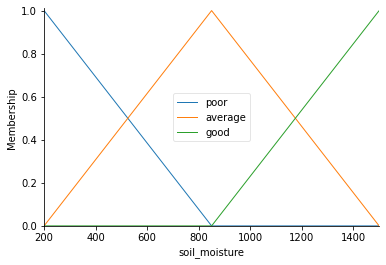

In [218]:
soil_moisture['poor'] = fuzz.trimf(soil_moisture.universe, [200, 200, 850])
soil_moisture['average'] = fuzz.trimf(soil_moisture.universe, [200, 850, 1500])
soil_moisture['good'] = fuzz.trimf(soil_moisture.universe, [850, 1500, 1500])
soil_moisture.view()

### Weather Forecast

Weather forecast is categorised in three different crisp values : Sunny, Cloudy and Rainy <br> 

Weather Forecast is defined using Gaussian membership function. The parameters are universe of discourse, mean (centre) value of range, and standard deviation.

In [219]:
# PrecipitationProbability['low'] = fuzz.trimf(PrecipitationProbability.universe, [0, 0, 45])
# PrecipitationProbability['normal'] = fuzz.trimf(PrecipitationProbability.universe, [20, 45, 70])
# PrecipitationProbability['high'] = fuzz.trimf(PrecipitationProbability.universe, [70, 100, 100])
# PrecipitationProbability.view()

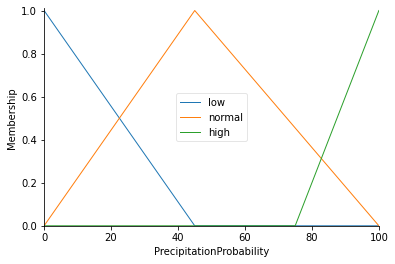

In [220]:
PrecipitationProbability['low'] = fuzz.trimf(PrecipitationProbability.universe, [0, 0, 45])
PrecipitationProbability['normal'] = fuzz.trimf(PrecipitationProbability.universe, [0, 45, 100])
PrecipitationProbability['high'] = fuzz.trimf(PrecipitationProbability.universe, [75, 100, 100])
PrecipitationProbability.view()

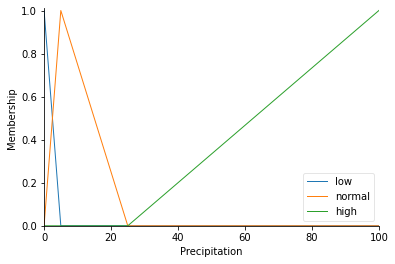

In [221]:
Precipitation['low'] = fuzz.trimf(Precipitation.universe, [0, 0, 5])
Precipitation['normal'] = fuzz.trimf(Precipitation.universe, [0, 5, 25])
Precipitation['high'] = fuzz.trimf(Precipitation.universe, [25, 100, 100])
Precipitation.view()

### Crop Status 

The Crop Status takes almost crisp values i.e. either dry, normal or high which can be defined using triangular membership fuction. <br>

It takes two arguments : universe of discourse, array [ starting value, centre value, ending value ]

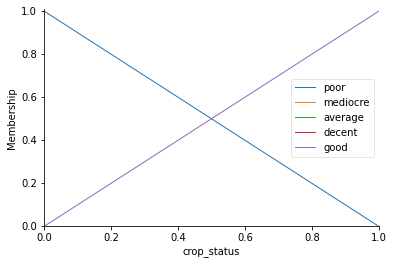

In [222]:
crop_status.automf()
crop_status.view()

### Consequent : Irrigation Duration (in minutes)

Irrigation Duration is in minutes in terms of less, medium and high. It also defined by Gaussian membership function.

In [223]:
# irrigation_duration.automf(3)
# irrigation_duration.view()


In [224]:
# irrigation_duration['poor'] = fuzz.trimf(irrigation_duration.universe, [0, 0, 2])
# irrigation_duration['average'] = fuzz.trimf(irrigation_duration.universe, [0, 3, 5])
# irrigation_duration['good'] = fuzz.trimf(irrigation_duration.universe, [5, 10, 10])
# irrigation_duration.view()


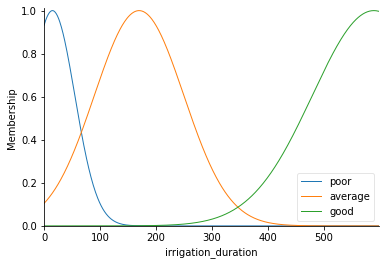

In [225]:
irrigation_duration['poor'] = fuzz.gaussmf(irrigation_duration.universe, 15, 40)
irrigation_duration['average'] = fuzz.gaussmf(irrigation_duration.universe, 170, 80)
irrigation_duration['good'] = fuzz.gaussmf(irrigation_duration.universe, 590, 110)
irrigation_duration.view()

In [226]:
# irrigation_duration['poor'] = fuzz.gaussmf(irrigation_duration.universe, 25, 50)
# irrigation_duration['average'] = fuzz.gaussmf(irrigation_duration.universe, 210, 100)
# irrigation_duration['good'] = fuzz.gaussmf(irrigation_duration.universe, 590, 110)
# irrigation_duration.view()


## Defining Fuzzy Rules

The fuzzy rules are defined as follows: <br>

Simple inferences are : <br>

<list>

<li>If the moisture is low and crop status is low then based on the water tank level, the water should be supplied. <br>

<li>If the moisture is medium and forecast is rainy, we may not need to supply water for longer time. <br>

<li>If the moisture is high and crop status is high then without looking at other antecedents the water supply should be provided for less time. <br>
    
</list>

In [227]:
i = 1
for x in ["poor", "average", "good"]:
    for y in ["low", "normal", "high"]:
        for z in ["low", "normal", "high"]:
            for w in ["poor", "good"]:
                a = ""
                if z == "high":
                    a = "rule" + str(i) + " = ctrl.Rule(soil_moisture['" + x + "'] & PrecipitationProbability['" + y + "'] & Precipitation['" + z + "'] & crop_status['" + w + "'], irrigation_duration['poor'])"
                else:
                    a = "rule" + str(i) + " = ctrl.Rule(soil_moisture['" + x + "'] & PrecipitationProbability['" + y + "'] & Precipitation['" + z + "'] & crop_status['" + w + "'], irrigation_duration[''])"
                print(a)
                i = i+1

rule1 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration[''])
rule2 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration[''])
rule3 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration[''])
rule4 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration[''])
rule5 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule6 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule7 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status[

In [228]:
rule1 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule2 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['good'])
rule3 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule4 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['average'])
rule5 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule6 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule7 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule8 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule9 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule10 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule11 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule12 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule13 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule14 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule15 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule16 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule17 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule18 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule19 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule20 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule21 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule22 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['average'])
rule23 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule24 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule25 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule26 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule27 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule28 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule29 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule30 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule31 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule32 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule33 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule34 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule35 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule36 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule37 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule38 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule39 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule40 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule41 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule42 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule43 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule44 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule45 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule46 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule47 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule48 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule49 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['poor'])
rule50 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule51 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['poor'])
rule52 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule53 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule54 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])


## Creating Fuzzy Controller from Fuzzy Rules

In [229]:
waterpump_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54])
irrigation_system = ctrl.ControlSystemSimulation(waterpump_ctrl)

## Using Fuzzy Controller

Here, the situation is : Soil moisture is low, weather forecast is cloduy, crop is dry and tank has enough supply of water, so the irrgation should be done for medium time as the forecast may change to rainy and if there is more water in fields it may introduce fungus and other plant root related diseases.

Irrigation Duraion:  1.4020402652187363


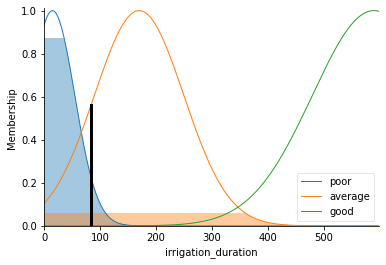

In [242]:
irrigation_system.input['soil_moisture'] = 900
irrigation_system.input['PrecipitationProbability'] = 52
irrigation_system.input['Precipitation'] = 4.7
irrigation_system.input['crop_status'] = 1
irrigation_system.compute()
print("Irrigation Duraion: ",irrigation_system.output['irrigation_duration']/60)
irrigation_duration.view(sim=irrigation_system)

Here the situation is as follows : <br>

The soil is medium moisturised, weather is sunny, crop is normal and tank is almost empty. So the water can be supplied for lower time until the tank gets totally empty.

The last case is given as : <br>

The soil is dry, the weather is sunny, crop is dry and tank level is almost full. Here crops can die due to less supply of water. We have enough water, we can supply water to the maximum rate possible.